<a href="https://colab.research.google.com/github/Hlo-Mayur/Fake-News-Prediction/blob/main/Notebook/Fake%20News%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the dependencies

In [19]:
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [20]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [21]:
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Pre-Processing


In [22]:
import csv
import sys
csv.field_size_limit(sys.maxsize)
news_dataset=pd.read_csv('/content/fakeNews.csv', engine='python')

In [23]:
news_dataset.shape

(20800, 5)

In [24]:
#printing the first 5 rows
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [25]:
#Counting the number of mission values in the dataset
news_dataset.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [26]:
#replacing the null value with empty string
news_dataset=news_dataset.fillna('')

In [27]:
news_dataset.dropna(subset=['label'], inplace=True)

The row with the null label has been removed. Let's verify by checking the null counts again and the shape of the dataset.

In [28]:
print(news_dataset.isnull().sum())
print(news_dataset.shape)

id        0
title     0
author    0
text      0
label     0
dtype: int64
(20800, 5)


In [29]:
#merging the author name and news title
news_dataset['content']=news_dataset['author']+' '+news_dataset['title']
news_dataset.head()


,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [30]:
#seperating the data and label
X=news_dataset.drop(columns='label',axis=1)
Y=news_dataset['label']

In [31]:
print(X)
print(Y)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

Steming is the process of reducing a word to its Root word

eg: actor,actress,acting -->act

In [32]:
port_stem=PorterStemmer()

In [33]:
def steaming(content):
  steamed_content=re.sub('[^a-zA-z]',' ',content)
  steamed_content=steamed_content.lower()
  steamed_content=steamed_content.split()
  steamed_content=[port_stem.stem(word) for word in steamed_content if not word in stopwords.words('english')]
  steamed_content=' '.join(steamed_content)
  return steamed_content


In [34]:
news_dataset['content']=news_dataset['content'].apply(steaming)

In [35]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [36]:
#seperating the data and label
X=news_dataset['content'].values
Y=news_dataset['label'].values

In [37]:
print(Y)

[1 0 1 ... 0 1 1]


In [38]:
Y.shape


(20800,)

In [42]:
#Converting the textual data to numerical data
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)

In [43]:
print(X)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 210632 stored elements and shape (20800, 17141)>
  Coords	Values
  (0, 268)	0.2701012497770876
  (0, 2485)	0.36765196867972083
  (0, 2962)	0.24684501285337127
  (0, 3603)	0.3598939188262558
  (0, 3795)	0.27053324808454915
  (0, 4979)	0.23331696690935097
  (0, 7012)	0.2187416908935914
  (0, 7698)	0.24785219520671598
  (0, 8636)	0.2921251408704368
  (0, 8915)	0.36359638063260746
  (0, 13480)	0.2565896679337956
  (0, 15697)	0.2848506356272864
  (1, 1498)	0.2939891562094648
  (1, 1895)	0.15521974226349364
  (1, 2224)	0.3827320386859759
  (1, 2816)	0.19094574062359204
  (1, 3571)	0.26373768806048464
  (1, 5510)	0.7143299355715573
  (1, 6823)	0.1904660198296849
  (1, 16812)	0.30071745655510157
  (2, 2946)	0.3179886800654691
  (2, 3106)	0.46097489583229645
  (2, 5396)	0.3866530551182615
  (2, 5975)	0.3474613386728292
  (2, 9625)	0.49351492943649944
  :	:
  (20797, 3646)	0.2115550061362374
  (20797, 7049)	0.21799048897828685
  (2079

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

Training the MOdel Logistic Regression

In [45]:
model=LogisticRegression()

In [46]:
model.fit(X_train,Y_train)

LogisticRegression()

In [47]:
#Evaluation of the model
X_train_prediction=model.predict(X_train)
training_data_accuracy=accuracy_score(X_train_prediction,Y_train)

In [48]:
print('Accuracy score of the training data :',training_data_accuracy)

Accuracy score of the training data : 0.9864783653846154


In [49]:
#accuracy score on the test data
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [50]:
print('Accuracy score of the test data :',test_data_accuracy)

Accuracy score of the test data : 0.979326923076923


Making a predicitve system

In [51]:
x_new=X_test[0]
prediction=model.predict(x_new)
print(prediction)
if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [52]:
print(Y_test[0])

1


## Import Visualization Libraries

### Subtask:
Import `matplotlib.pyplot` and `seaborn` for creating visualizations.


**Reasoning**:
The subtask requires importing `matplotlib.pyplot` as `plt` and `seaborn` as `sns` for visualization. I will use a code block to perform these imports.



In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
print("Visualization libraries imported successfully.")

Visualization libraries imported successfully.


## Confusion Matrix

### Subtask:
Generate and visualize the confusion matrix for the model's predictions on the test set (`Y_test`, `X_test_prediction`).

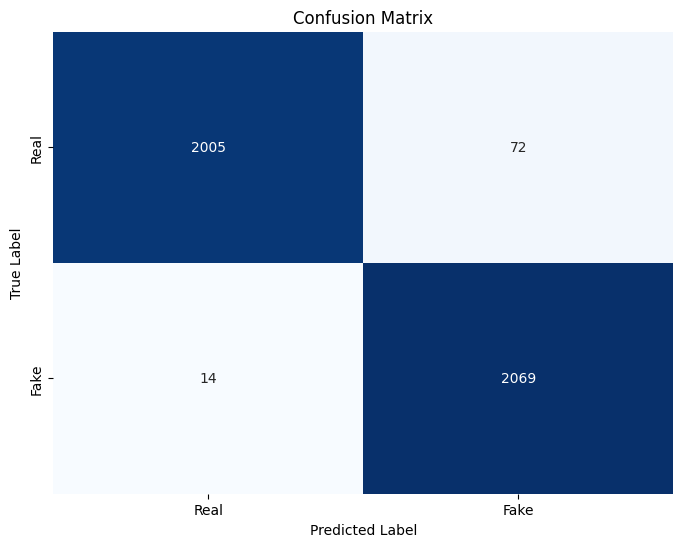

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(Y_test, X_test_prediction)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


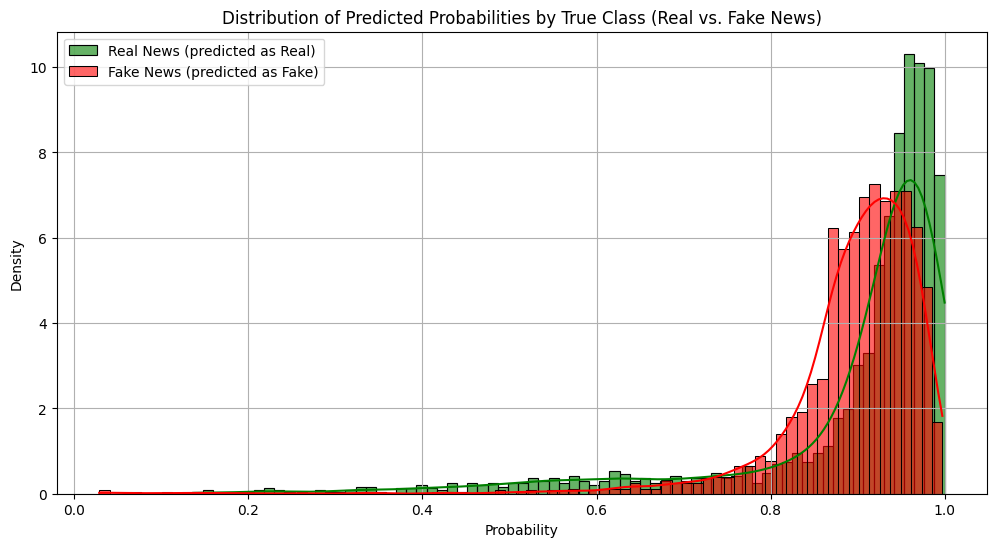

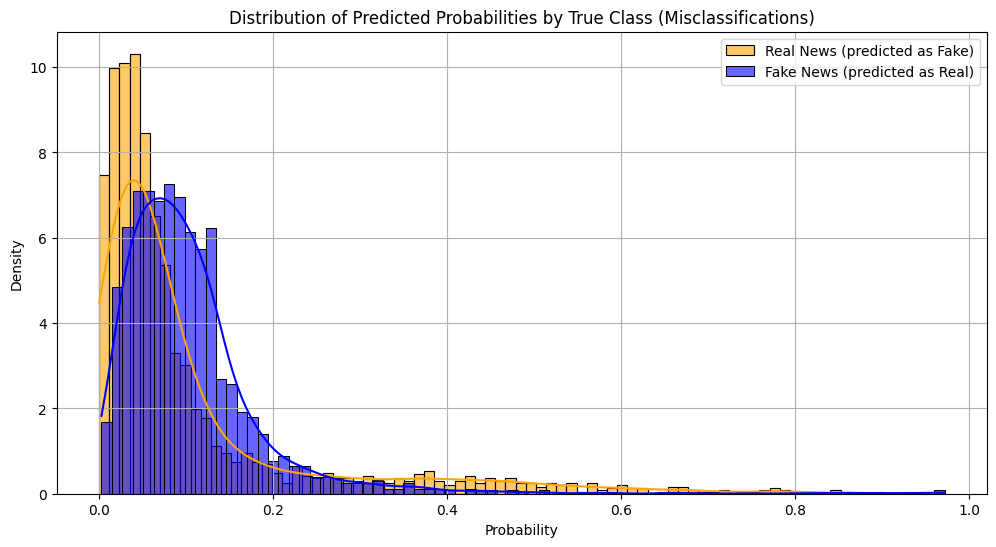

In [55]:
probabilities = model.predict_proba(X_test)

plt.figure(figsize=(12, 6))
sns.histplot(probabilities[Y_test == 0, 0], color='green', label='Real News (predicted as Real)', kde=True, stat='density', alpha=0.6)
sns.histplot(probabilities[Y_test == 1, 1], color='red', label='Fake News (predicted as Fake)', kde=True, stat='density', alpha=0.6)
plt.title('Distribution of Predicted Probabilities by True Class (Real vs. Fake News)')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(probabilities[Y_test == 0, 1], color='orange', label='Real News (predicted as Fake)', kde=True, stat='density', alpha=0.6)
sns.histplot(probabilities[Y_test == 1, 0], color='blue', label='Fake News (predicted as Real)', kde=True, stat='density', alpha=0.6)
plt.title('Distribution of Predicted Probabilities by True Class (Misclassifications)')
plt.xlabel('Probability')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

/tmp/ipython-input-3709659702.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=top_20_positive, palette='viridis')
/tmp/ipython-input-3709659702.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='coefficient', y='feature', data=top_20_negative, palette='magma')


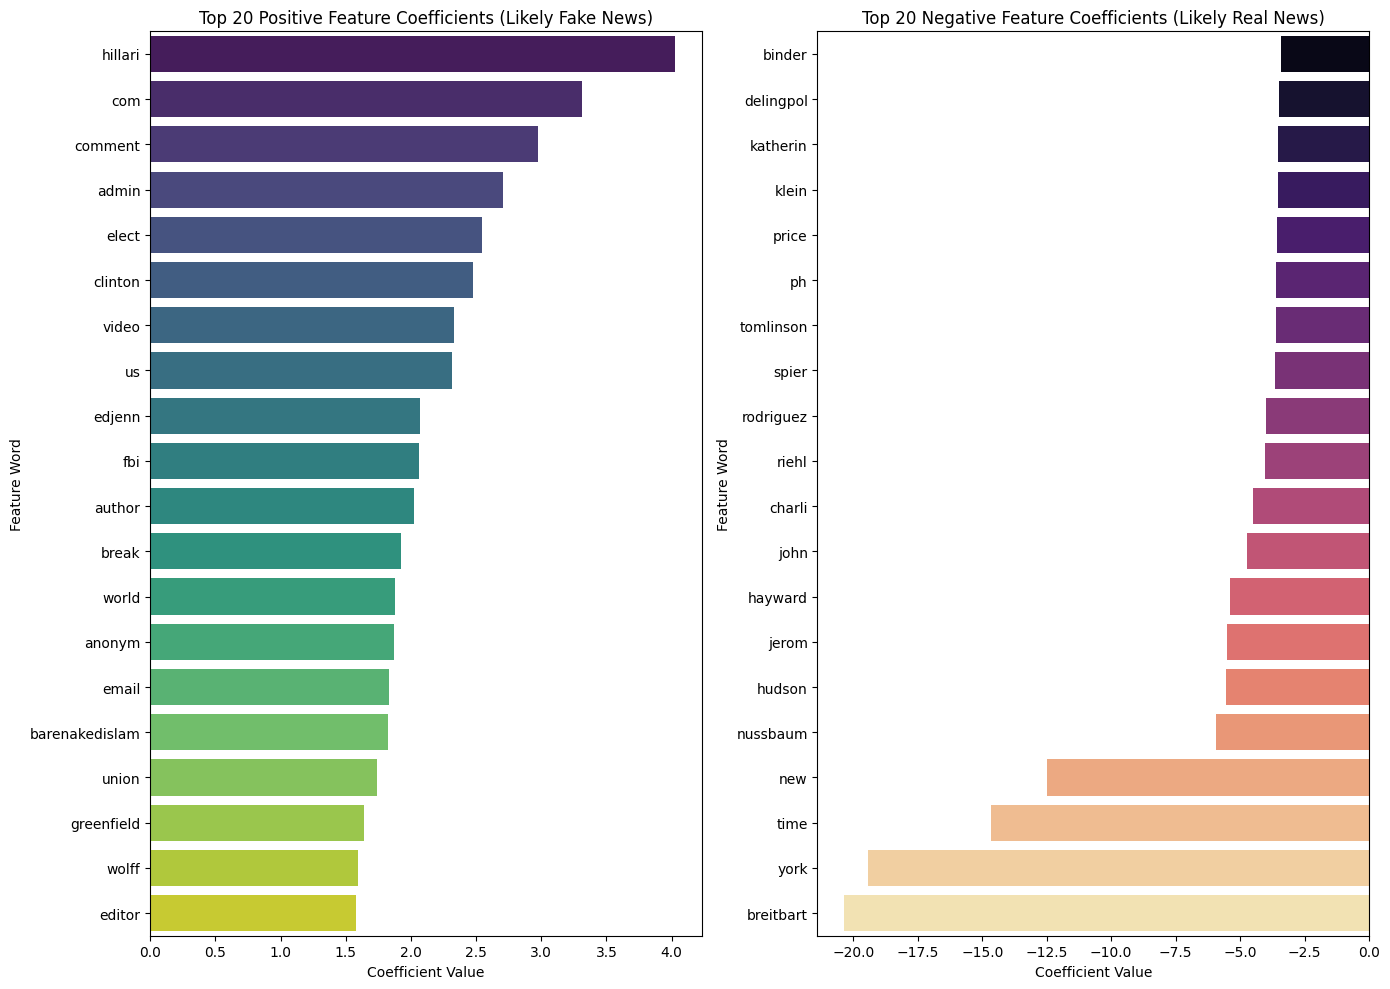

In [56]:
feature_names = vectorizer.get_feature_names_out()
coefficients = model.coef_[0]

# Create a DataFrame for easier sorting and plotting
coeff_df = pd.DataFrame({'feature': feature_names, 'coefficient': coefficients})

# Sort by coefficient values
coeff_df_sorted = coeff_df.sort_values(by='coefficient', ascending=False)

# Get top 20 positive and top 20 negative features
top_20_positive = coeff_df_sorted.head(20)
top_20_negative = coeff_df_sorted.tail(20)

# Plotting
plt.figure(figsize=(14, 10))

# Top 20 Positive Coefficients (associated with one class, e.g., Fake News)
plt.subplot(1, 2, 1)
sns.barplot(x='coefficient', y='feature', data=top_20_positive, palette='viridis')
plt.title('Top 20 Positive Feature Coefficients (Likely Fake News)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Word')

# Top 20 Negative Coefficients (associated with the other class, e.g., Real News)
plt.subplot(1, 2, 2)
sns.barplot(x='coefficient', y='feature', data=top_20_negative, palette='magma')
plt.title('Top 20 Negative Feature Coefficients (Likely Real News)')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature Word')

plt.tight_layout()
plt.show()